Exploration of How Social Media Can Predict Winning Metrics Better Than Salary
*Added a few more analysis in the end*

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
color = sns.color_palette()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
attendance_valuation_elo_df = pd.read_csv("../input/nba_2017_att_val_elo.csv");attendance_valuation_elo_df.head()

,Unnamed: 0,TEAM,GMS,TOTAL,AVG,PCT,VALUE_MILLIONS,ELO,CONF
0,0,Chicago Bulls,41,888882,21680,103.6,2500.0,1519,East
1,1,Dallas Mavericks,41,811366,19789,103.1,1450.0,1420,West
2,2,Sacramento Kings,41,721928,17608,100.6,1075.0,1393,West
3,3,Miami Heat,41,805400,19643,100.2,1350.0,1569,East
4,4,Toronto Raptors,41,813050,19830,100.2,1125.0,1600,East


In [3]:
salary_df = pd.read_csv("../input/nba_2017_salary.csv");salary_df.head()


,NAME,POSITION,TEAM,SALARY
0,LeBron James,SF,Cleveland Cavaliers,30963450.0
1,Mike Conley,PG,Memphis Grizzlies,26540100.0
2,Al Horford,C,Boston Celtics,26540100.0
3,Dirk Nowitzki,PF,Dallas Mavericks,25000000.0
4,Carmelo Anthony,SF,New York Knicks,24559380.0


In [4]:
pie_df = pd.read_csv("../input/nba_2017_pie.csv");pie_df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,...,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
0,Russell Westbrook,OKC,28,81,46,35,34.6,107.9,104.6,3.3,...,23.4,5.3,27.9,16.7,12.2,47.6,55.4,40.8,102.31,23.0
1,Boban Marjanovic,DET,28,35,16,19,8.4,104.3,102.4,1.9,...,5.1,16.6,31.3,23.9,5.7,54.5,60.6,24.8,97.20,19.6
2,Demetrius Jackson,BOS,22,5,1,4,3.4,124.2,117.8,6.3,...,31.1,9.1,11.8,10.3,0.0,87.5,75.3,17.2,87.46,19.4
3,Anthony Davis,NOP,24,75,31,44,36.1,104.2,102.5,1.7,...,7.3,6.7,26.9,17.0,8.4,51.8,58.0,32.6,100.19,19.2
4,James Harden,HOU,27,81,54,27,36.4,113.6,107.3,6.3,...,27.6,3.5,21.2,12.3,14.1,52.5,61.3,34.1,102.98,19.0


In [5]:
plus_minus_df = pd.read_csv("../input/nba_2017_real_plus_minus.csv");plus_minus_df.head()

,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS
0,"LeBron James, SF",CLE,74,37.8,6.49,1.93,8.42,20.43
1,"Stephen Curry, PG",GS,79,33.4,7.27,0.14,7.41,18.80
2,"Jimmy Butler, SG",CHI,76,37.0,4.82,1.80,6.62,17.35
3,"Russell Westbrook, PG",OKC,81,34.6,6.74,-0.47,6.27,17.34
4,"Draymond Green, PF",GS,76,32.5,1.55,5.59,7.14,16.84


In [6]:
br_stats_df = pd.read_csv("../input/nba_2017_br.csv");br_stats_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,...,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
1,2,James Harden,PG,27,HOU,81,81,36.4,8.3,18.9,...,0.847,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1
2,3,Isaiah Thomas,PG,27,BOS,76,76,33.8,9.0,19.4,...,0.909,0.6,2.1,2.7,5.9,0.9,0.2,2.8,2.2,28.9
3,4,Anthony Davis,C,23,NOP,75,75,36.1,10.3,20.3,...,0.802,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0
4,5,DeMar DeRozan,SG,27,TOR,74,74,35.4,9.7,20.9,...,0.842,0.9,4.3,5.2,3.9,1.1,0.2,2.4,1.8,27.3


In [7]:

plus_minus_df.rename(columns={"NAME":"PLAYER", "WINS": "WINS_RPM"}, inplace=True)
players = []
for player in plus_minus_df["PLAYER"]:
    plyr, _ = player.split(",")
    players.append(plyr)
plus_minus_df.drop(["PLAYER"], inplace=True, axis=1)
plus_minus_df["PLAYER"] = players
plus_minus_df.head()

,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PLAYER
0,CLE,74,37.8,6.49,1.93,8.42,20.43,LeBron James
1,GS,79,33.4,7.27,0.14,7.41,18.80,Stephen Curry
2,CHI,76,37.0,4.82,1.80,6.62,17.35,Jimmy Butler
3,OKC,81,34.6,6.74,-0.47,6.27,17.34,Russell Westbrook
4,GS,76,32.5,1.55,5.59,7.14,16.84,Draymond Green


In [8]:

nba_players_df = br_stats_df.copy()
nba_players_df.rename(columns={'Player': 'PLAYER','Pos':'POSITION', 'Tm': "TEAM", 'Age': 'AGE', "PS/G": "POINTS"}, inplace=True)
nba_players_df.drop(["G", "GS", "TEAM"], inplace=True, axis=1)
nba_players_df = nba_players_df.merge(plus_minus_df, how="inner", on="PLAYER")
nba_players_df.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,TOV,PF,POINTS,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,5.4,2.3,31.6,OKC,81,34.6,6.74,-0.47,6.27,17.34
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,5.7,2.7,29.1,HOU,81,36.4,6.38,-1.57,4.81,15.54
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,2.8,2.2,28.9,BOS,76,33.8,5.72,-3.89,1.83,8.19
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,2.4,2.2,28.0,NO,75,36.1,0.45,3.90,4.35,12.81
4,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,1.7,...,2.4,1.8,27.3,TOR,74,35.4,2.21,-2.04,0.17,5.46


In [9]:

pie_df_subset = pie_df[["PLAYER", "PIE", "PACE", "W"]].copy()
nba_players_df = nba_players_df.merge(pie_df_subset, how="inner", on="PLAYER")
nba_players_df.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,OKC,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,HOU,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,BOS,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,NO,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31
4,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,1.7,...,TOR,74,35.4,2.21,-2.04,0.17,5.46,15.5,97.69,47


In [10]:
salary_df.rename(columns={'NAME': 'PLAYER'}, inplace=True)
salary_df["SALARY_MILLIONS"] = round(salary_df["SALARY"]/1000000, 2)
salary_df.drop(["POSITION","TEAM", "SALARY"], inplace=True, axis=1)
salary_df.head()

,PLAYER,SALARY_MILLIONS
0,LeBron James,30.96
1,Mike Conley,26.54
2,Al Horford,26.54
3,Dirk Nowitzki,25.00
4,Carmelo Anthony,24.56


In [11]:
diff = list(set(nba_players_df["PLAYER"].values.tolist()) - set(salary_df["PLAYER"].values.tolist()))
print (diff)

['Darrun Hilliard', 'Semaj Christon', 'Lavoy Allen', 'Cheick Diallo', 'Thomas Robinson', 'James Jones', 'Dorian Finney-Smith', 'Skal Labissiere', 'Georges Niang', 'Alex Poythress', 'Quinn Cook', 'Justin Holiday', 'Ivica Zubac', 'Joe Young', 'Ben Bentil', 'Raymond Felton', 'Hollis Thompson', 'Matt Barnes', 'Davis Bertans', 'Rodney McGruder', 'Hassan Whiteside', 'Joel Bolomboy', 'Ron Baker', 'Richaun Holmes', 'JaMychal Green', 'Salah Mejri', 'Terrence Jones', 'Alan Anderson', 'Robert Covington', 'Derrick Williams', 'Seth Curry', 'Norris Cole', 'Jose Calderon', 'Isaiah Whitehead', 'Andre Drummond', 'Jerami Grant', 'Dahntay Jones', 'Montrezl Harrell', 'Zaza Pachulia', 'Jeff Withey', 'Anthony Tolliver', 'Richard Jefferson', 'Patrick Beverley', 'Chinanu Onuaku', 'Joe Harris', 'Brandon Bass', 'Damjan Rudez', 'Jason Terry', 'Cristiano Felicio', 'Sasha Vujacic', 'Pascal Siakam', 'Jordan McRae', 'David Nwaba', 'Bobby Brown', 'Daniel Ochefu', 'Metta World Peace', 'Isaiah Taylor', 'Tim Quarterman'

In [12]:
len(diff)


111

In [13]:

nba_players_with_salary_df = nba_players_df.merge(salary_df); 

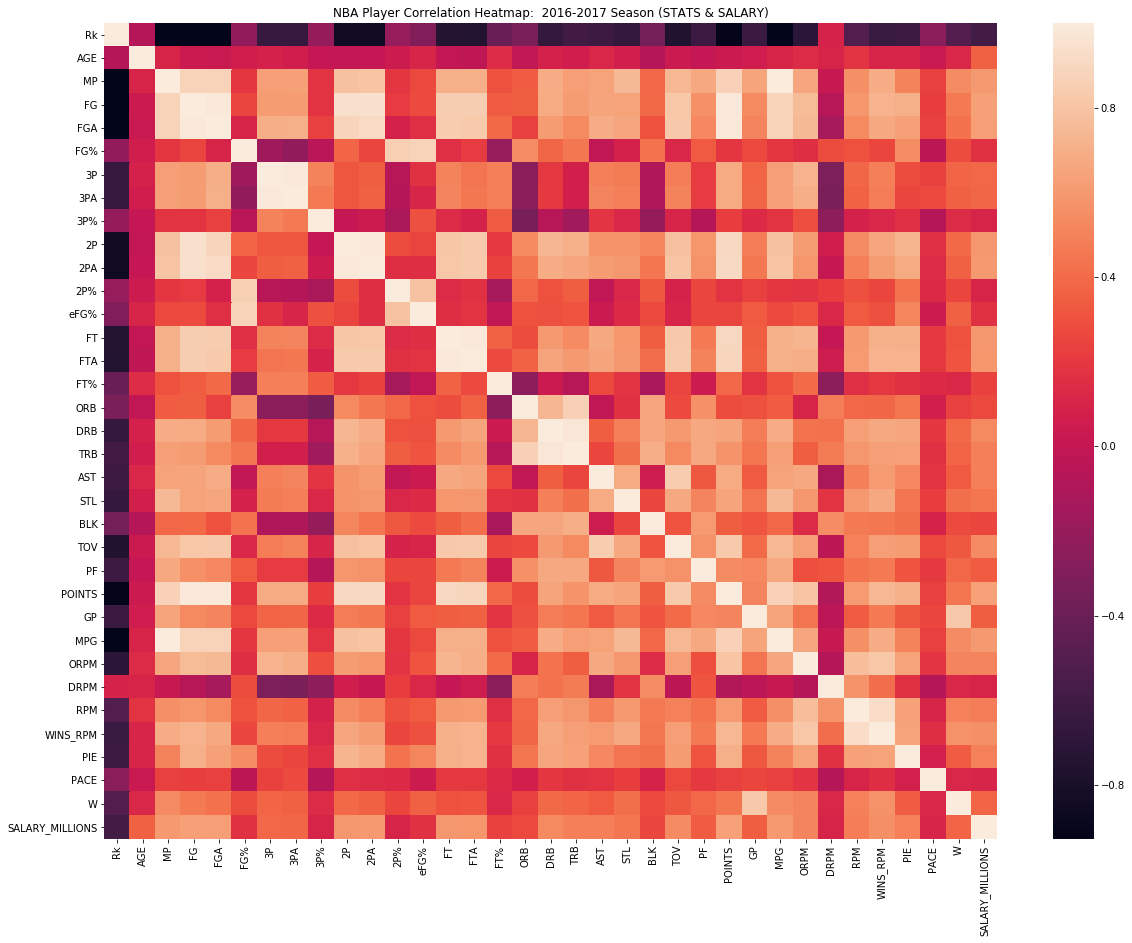

In [14]:

plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("NBA Player Correlation Heatmap:  2016-2017 Season (STATS & SALARY)")
corr = nba_players_with_salary_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

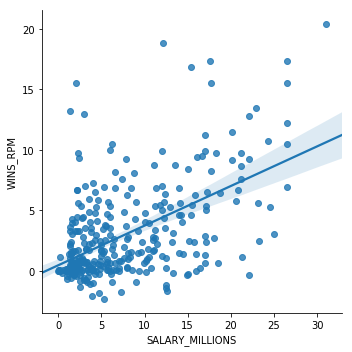

In [15]:
sns.lmplot(x="SALARY_MILLIONS", y="WINS_RPM", data=nba_players_with_salary_df)


In [16]:
results = smf.ols('W ~POINTS', data=nba_players_with_salary_df).fit()


In [17]:
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     84.74
Date:                Fri, 19 Jan 2018   Prob (F-statistic):           3.57e-18
Time:                        00:45:49   Log-Likelihood:                -1363.7
No. Observations:                 342   AIC:                             2731.
Df Residuals:                     340   BIC:                             2739.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1105      1.282     14.908      0.0

In [18]:
results = smf.ols('W ~WINS_RPM', data=nba_players_with_salary_df).fit()


In [19]:
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     162.9
Date:                Fri, 19 Jan 2018   Prob (F-statistic):           9.34e-31
Time:                        00:45:49   Log-Likelihood:                -1334.8
No. Observations:                 342   AIC:                             2674.
Df Residuals:                     340   BIC:                             2681.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.8208      0.808     28.233      0.0

In [20]:
results = smf.ols('SALARY_MILLIONS ~POINTS', data=nba_players_with_salary_df).fit()


In [21]:
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:        SALARY_MILLIONS   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     230.2
Date:                Fri, 19 Jan 2018   Prob (F-statistic):           4.49e-40
Time:                        00:45:49   Log-Likelihood:                -1037.4
No. Observations:                 342   AIC:                             2079.
Df Residuals:                     340   BIC:                             2086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0479      0.494      2.123      0.0

In [22]:
results = smf.ols('SALARY_MILLIONS ~WINS_RPM', data=nba_players_with_salary_df).fit()


In [23]:
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:        SALARY_MILLIONS   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     147.6
Date:                Fri, 19 Jan 2018   Prob (F-statistic):           1.86e-28
Time:                        00:45:49   Log-Likelihood:                -1064.1
No. Observations:                 342   AIC:                             2132.
Df Residuals:                     340   BIC:                             2140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6501      0.366     12.695      0.0

In [24]:
from ggplot import *


/opt/conda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/opt/conda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


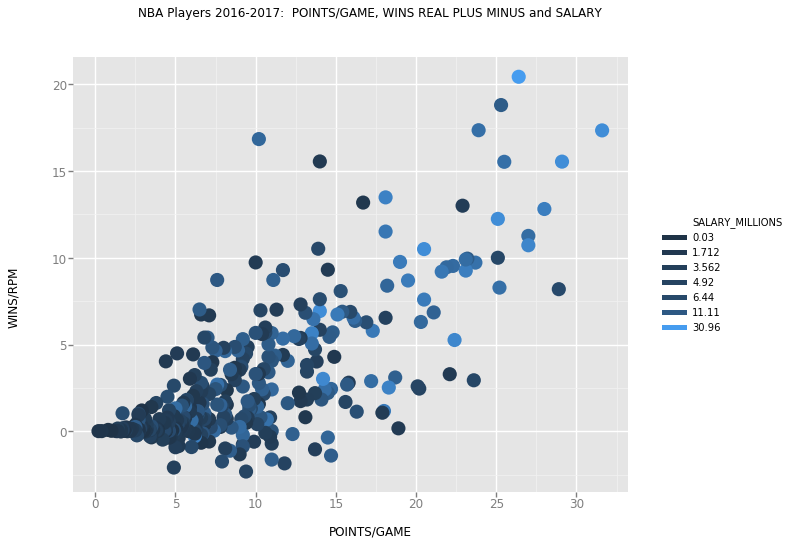

<ggplot: (8747908366312)>

In [25]:

p = ggplot(nba_players_with_salary_df,aes(x="POINTS", y="WINS_RPM", color="SALARY_MILLIONS")) + geom_point(size=200)
p + xlab("POINTS/GAME") + ylab("WINS/RPM") + ggtitle("NBA Players 2016-2017:  POINTS/GAME, WINS REAL PLUS MINUS and SALARY")

In [26]:
wiki_df = pd.read_csv("../input/nba_2017_player_wikipedia.csv");wiki_df.head()


,Unnamed: 0,names,pageviews,timestamps,wikipedia_handles
0,0,Russell Westbrook,3400,2016010100,Russell_Westbrook
1,1,Russell Westbrook,2893,2016010200,Russell_Westbrook
2,2,Russell Westbrook,3209,2016010300,Russell_Westbrook
3,3,Russell Westbrook,2531,2016010400,Russell_Westbrook
4,4,Russell Westbrook,2599,2016010500,Russell_Westbrook


In [27]:
wiki_df.rename(columns={'names': 'PLAYER', "pageviews": "PAGEVIEWS"}, inplace=True)


In [28]:
median_wiki_df = wiki_df.groupby("PLAYER").median()


In [29]:

median_wiki_df_small = median_wiki_df[["PAGEVIEWS"]]

In [30]:
median_wiki_df_small = median_wiki_df_small.reset_index()


In [31]:
nba_players_with_salary_wiki_df = nba_players_with_salary_df.merge(median_wiki_df_small)


In [32]:
twitter_df = pd.read_csv("../input/nba_2017_twitter_players.csv");twitter_df.head()


,PLAYER,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,Russell Westbrook,2130.5,559.0
1,James Harden,969.0,321.5
2,Isaiah Thomas,467.5,155.5
3,Anthony Davis,368.0,104.0
4,DeMar DeRozan,0.0,186.0


In [33]:
nba_players_with_salary_wiki_twitter_df = nba_players_with_salary_wiki_df.merge(twitter_df)


In [34]:
nba_players_with_salary_wiki_twitter_df.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,7.7,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


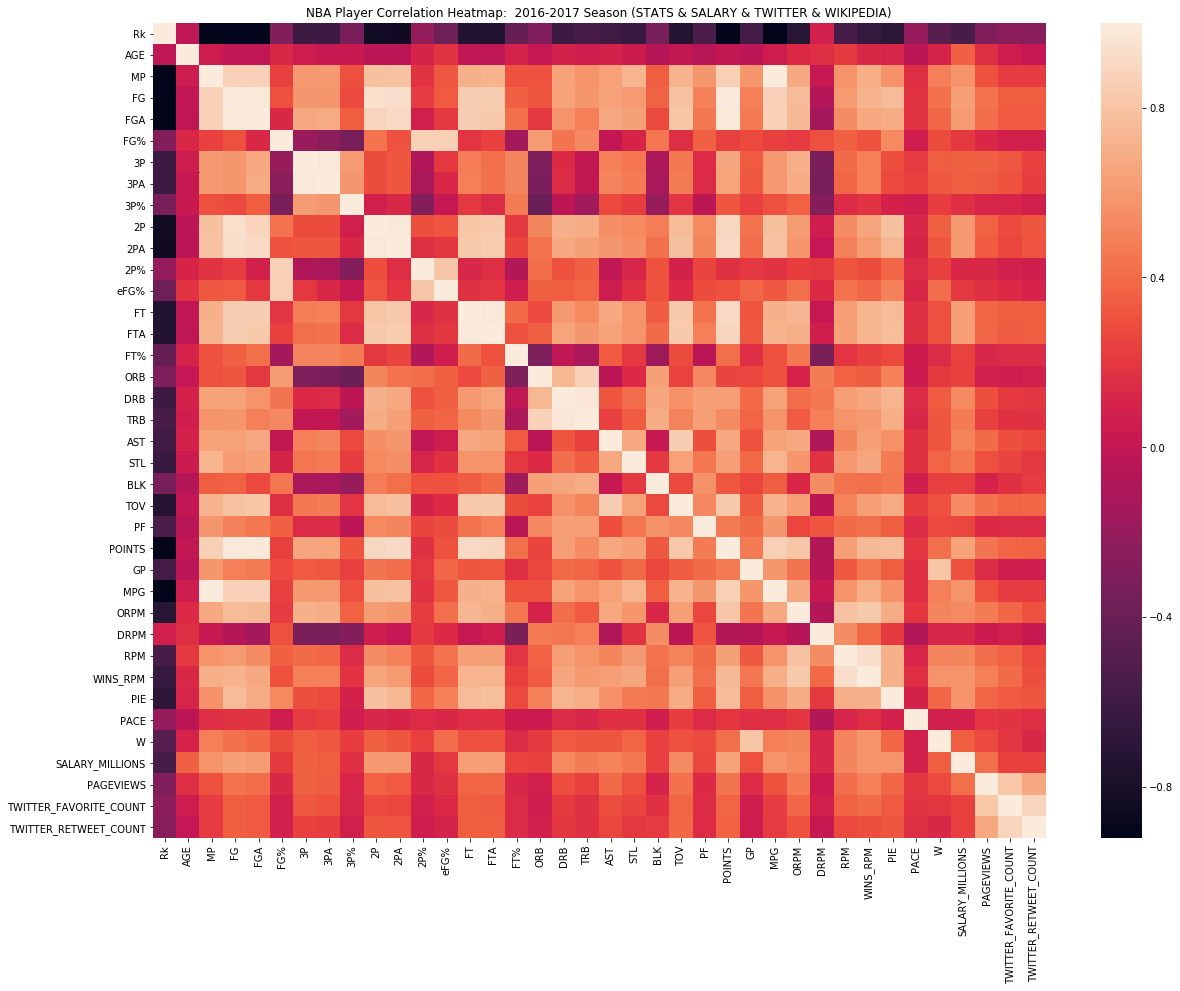

In [35]:

plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("NBA Player Correlation Heatmap:  2016-2017 Season (STATS & SALARY & TWITTER & WIKIPEDIA)")
corr = nba_players_with_salary_wiki_twitter_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

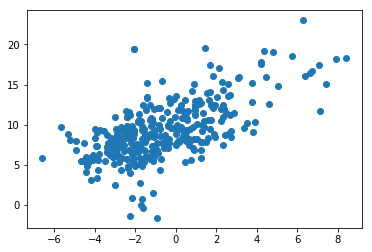

In [36]:
plt.scatter(nba_players_with_salary_df['RPM'],nba_players_with_salary_df['PIE'])
plt.show()

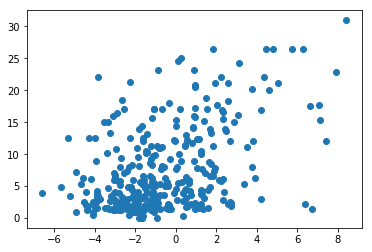

In [37]:
plt.scatter(nba_players_with_salary_df['RPM'],nba_players_with_salary_df['SALARY_MILLIONS'])
plt.show()

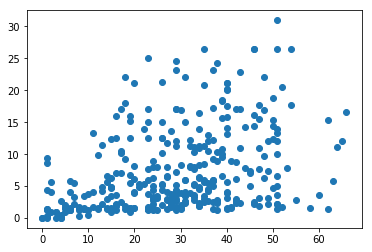

In [38]:
plt.scatter(nba_players_with_salary_df['W'],nba_players_with_salary_df['SALARY_MILLIONS'])
plt.show()

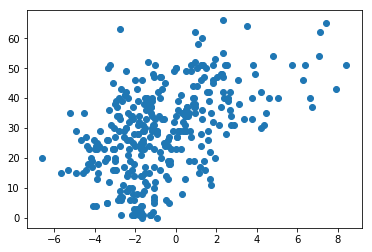

In [39]:
plt.scatter(nba_players_with_salary_df['RPM'],nba_players_with_salary_df['W'])
plt.show()

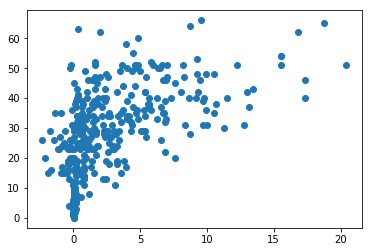

In [40]:
plt.scatter(nba_players_with_salary_df['WINS_RPM'],nba_players_with_salary_df['W'])
plt.show()

In [41]:
results = smf.ols('WINS_RPM ~RPM + W', data=nba_players_with_salary_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               WINS_RPM   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1184.
Date:                Fri, 19 Jan 2018   Prob (F-statistic):          1.23e-153
Time:                        00:45:51   Log-Likelihood:                -593.34
No. Observations:                 342   AIC:                             1193.
Df Residuals:                     339   BIC:                             1204.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5941      0.197     13.176      0.0